In [ ]:
import pandas as pd
from google.colab import drive   

In [ ]:
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import os 
os.chdir("/content/drive/MyDrive/THESIS_May15")

In [ ]:
jan20_df = pd.read_csv("/content/drive/MyDrive/THESIS_May15/jan2020_reddit.csv")
feb20_df = pd.read_csv("/content/drive/MyDrive/THESIS_May15/feb2020_reddit.csv")
mar20_df = pd.read_csv("/content/drive/MyDrive/THESIS_May15/mar2020_reddit.csv")
apr20_df = pd.read_csv("/content/drive/MyDrive/THESIS_May15/apr2020_reddit.csv")
nov20_df = pd.read_csv("/content/drive/MyDrive/THESIS_May15/nov2020_reddit.csv")
gbq19_df = pd.read_csv("/content/drive/MyDrive/THESIS_May15/gbq_reddit_2019.csv")

In [ ]:
jan20_df.head()

,Unnamed: 0,0
0,0,"i'm watching the new season of the expanse, an..."
1,1,NaN
2,2,NaN
3,3,[deleted]
4,4,I've been following this [story](https://www.t...


In [ ]:
feb20_df.head()

,Unnamed: 0,0
0,0,"So far we’ve had Kobe, Coronavirus, and Trump:..."
1,1,"Was a part of the sub Wuhan_flu, joined, it wa..."
2,2,[removed]
3,3,Where are the:\n\nPhone lines? Phone calls? Le...
4,4,[removed]


In [ ]:
mar20_df.head()

,Unnamed: 0,0
0,0,[deleted]
1,1,NaN
2,2,NaN
3,3,[deleted]
4,4,NaN


In [ ]:
apr20_df.head()

,Unnamed: 0,0
0,0,NaN
1,1,NaN
2,2,This is the first amendment.\n\nCongress shall...
3,3,The new world order means putting everything i...
4,4,NaN


In [ ]:
nov20_df.head()

,Unnamed: 0,0
0,0,I'm here for conspiracies and yes they are pol...
1,1,It's been 2 hours since the sun went down. \n...
2,2,After watching sneakers I thought that would b...
3,3,NaN
4,4,Has the issue of China and the WHO been covere...


In [ ]:
gbq19_df.head()

,selftext
0,https://www.reddit.com/r/conspiracy/comments/4...
1,Statement by Head of British Intelligence abou...
2,I'm watching on youtube and sounds like someon...
3,"Just a theory, wondering if anyone else is see..."
4,\n\nI am not really a subscriber to **Illumi...


In [ ]:
concat20 = pd.concat([jan20_df, feb20_df, mar20_df, apr20_df, nov20_df], axis = 0, ignore_index = True)
concat20.shape

(71556, 2)

In [ ]:
concat20_fin = concat20["0"]
concat20_fin.shape

(71556,)

In [ ]:
gbq19_df.columns = ["0"]

In [ ]:
type(concat20_fin)

pandas.core.series.Series

In [ ]:
type(gbq19_df)

pandas.core.frame.DataFrame

In [ ]:
gbq19_srs = pd.Series(gbq19_df["0"])

In [ ]:
gbq_pshshft = pd.concat([concat20_fin, gbq19_srs], axis = 0, ignore_index = True)
gbq_pshshft.shape

(197300,)

In [ ]:
gbq_pshshft.head(20)

0     i'm watching the new season of the expanse, an...
1                                                   NaN
2                                                   NaN
3                                             [deleted]
4     I've been following this [story](https://www.t...
5                                             [deleted]
6     I'm convinced that it's a collective marketing...
7                       Disobedient highlights of 2019.
8                                                   NaN
9                                 Tell me what you know
10                                                  NaN
11                                            [deleted]
12                                                  NaN
13                                            [deleted]
14                                            [deleted]
15                                                  NaN
16                                            [deleted]
17    [Jeffrey Baumann inspires Bruins crowd 19 

In [ ]:
gbq_pshshft.dropna(inplace = True)

In [ ]:
gbq_pshshft.shape

(166398,)

In [ ]:
gbq_pshshft = gbq_pshshft[gbq_pshshft != "[deleted]"]
gbq_pshshft.shape

(152510,)

In [ ]:
gbq_pshshft = gbq_pshshft[gbq_pshshft != "[removed]"]
gbq_pshshft.shape

(147915,)

In [ ]:
gbq_pshshft.drop_duplicates(inplace = True)

DATA CLEANING'DEN ÖNCE şöyle bir adım daha ekliyorum. Postların ortalama bir uzunluğu kaç, dağılımları nasıl? 

In [ ]:
post_length = gbq_pshshft.apply(lambda x: len(x))
post_length.head(10)

0      674
4     1083
6      257
7       31
9       21
17     567
29      87
31    1842
32     251
34    1044
Name: 0, dtype: int64

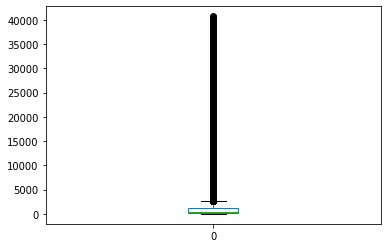

In [ ]:
post_length.plot.box()

In [ ]:
post_length.describe()

count    147715.000000
mean       1207.433267
std        2495.123942
min           1.000000
25%         210.000000
50%         482.000000
75%        1164.000000
max       40719.000000
Name: 0, dtype: float64

In [ ]:
for i in range(50):

  print(gbq_pshshft.iloc[i])
  print("---")

i'm watching the new season of the expanse, and noticed that on mars they have "police actions" where law-abiding citizens have to go through basically what prisoners do today.  they all had to stop, kneel down with their hands up, and let the cops go through &amp; "save the day" or whatever.  and i also saw this happen in a private residence, with the cops just walking right in, the door opened automatically.

so could that be predictive programming for dealing with police in the future?  i also noticed the pose is similar to the pose you have to make while going through a scanner at the airport IRL.  so people are getting programmed to assume the position already.
---
I've been following this [story](https://www.theblaze.com/news/shooting_parishioners_return_fire) and noticed that every article refers to the churchgoers who shot back in the plural, indicating that there were more than one churchgoer who shot the gunman. Some articles like this [one](https://amp.dailycaller.com/2019/1

In [ ]:
import re

def clean_text(given_text):
  
  message = re.sub(r'(http[s]?\S+)', ' ', given_text) #Replace URLs with space because it might be too freq in this class   
  message = re.sub(r'(w{2}\.\S+)', ' ', message) #Replace URLs with space because it might be too freq in this class    
  message = re.sub(r'&[a-zA-Z]*', ' ', message) #also another code to remove the stuff with ampersand    
  message = re.sub(r'[^\w\d\s]', ' ', message) #punctuation removed (it removes * too!)
  message = re.sub(r'\d+(\.\d+)?', ' ', message)  #Replace numbers with space   
  message = re.sub(r'\s+', ' ', message) #too muchs space removed
  message = re.sub(r'^\s+|\s+?$', '', message.lower()) #Get rid of spaces at the beginning and at the end

  return message

ATTENTION! Also beware, do not forget to go over the posts again just in case some posts have been reduced to empty lines because they were solely http links!

In [ ]:
gbq_pshshft.shape

(147715,)

In [ ]:
cleaned_gbq_pshshft = gbq_pshshft.apply(clean_text)

In [ ]:
for i in range(50):

  print(cleaned_gbq_pshshft.iloc[i])
  print("---")

i m watching the new season of the expanse and noticed that on mars they have police actions where law abiding citizens have to go through basically what prisoners do today they all had to stop kneel down with their hands up and let the cops go through save the day or whatever and i also saw this happen in a private residence with the cops just walking right in the door opened automatically so could that be predictive programming for dealing with police in the future i also noticed the pose is similar to the pose you have to make while going through a scanner at the airport irl so people are getting programmed to assume the position already
---
i ve been following this story and noticed that every article refers to the churchgoers who shot back in the plural indicating that there were more than one churchgoer who shot the gunman some articles like this one specifically indicate that exactly two churchgoers shot the gunman however if you refer back to my first link you can watch the vid

In [ ]:
cleaned_gbq_pshshft = cleaned_gbq_pshshft[cleaned_gbq_pshshft != r""]

In [ ]:
cleaned_gbq_pshshft.shape

(144230,)

In [ ]:
cleaned_gbq_pshshft.value_counts()[:30]

source                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          510
x b                                                                                                                                                                                                                                                                                                 

Ben bu durumdan şunu söyleyebilirim, 20 karakterden az olan yorum body'leri çok jenerik ve doc2vec'in öğrenmesinin ilginç olmayabileceği şeyler içeriyor (just saying, just sayin, just curious, what do you think). O yüzden 20 karakterden az olan post'ları kaldırmaya karar verdim. 

In [ ]:
cleaned_gbq_pshshft.drop_duplicates(inplace = True)
cleaned_gbq_pshshft.shape

(142566,)

In [ ]:
cleaned_gbq_pshshft.dropna(inplace = True)
cleaned_gbq_pshshft.shape

(142566,)

In [ ]:
cleaned_gbq_pshshft.head()

0    i m watching the new season of the expanse and...
4    i ve been following this story and noticed tha...
6    i m convinced that it s a collective marketing...
7                            disobedient highlights of
9                                tell me what you know
Name: 0, dtype: object

In [ ]:
#This is where I remove the posts shorter than 20 characters. 

cleaned_gbq_pshshft_postlen = cleaned_gbq_pshshft.apply(lambda x: len(x))
longer_cleaned_gbq_pshshft = cleaned_gbq_pshshft[cleaned_gbq_pshshft_postlen >= 20]  
longer_cleaned_gbq_pshshft.shape

(140736,)

In [ ]:
longer_cleaned_gbq_pshshft.to_csv("cleaned_gbq_pshshft.csv")